# Linear Regression

## Problem Statement
#### Build a multiple linear regression model for the prediction of demand for shared bikes. 

## The company wants to know:

   #### -Which variables are significant in predicting the demand for shared bikes.
   #### -How well those variables describe the bike demands.

## Steps involved
#### Step 1: Reading and Understanding the Data
#### Step 2: Visualising the Data
#### Step 3: Data Preparation
#### Step 4: Splitting the Data into Training and Testing Sets
#### Step 5: Building a linear model
#### Step 6: Residual Analysis of the train data
#### Step 7: Making Predictions Using the Final Model
#### Step 8: Model Evaluation

## Step 1: Reading and Understanding the Data

In [1]:
# importing libraries

import pandas as pd , numpy as np , matplotlib.pyplot as plt , seaborn as sns

In [2]:
# Reading the data set

df= pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Dropping uneccessary columns

In [9]:
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [10]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [11]:
# Converting to category data type.

In [12]:
df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df['weekday']=df['weekday'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


## Step 2: Visualising the Data

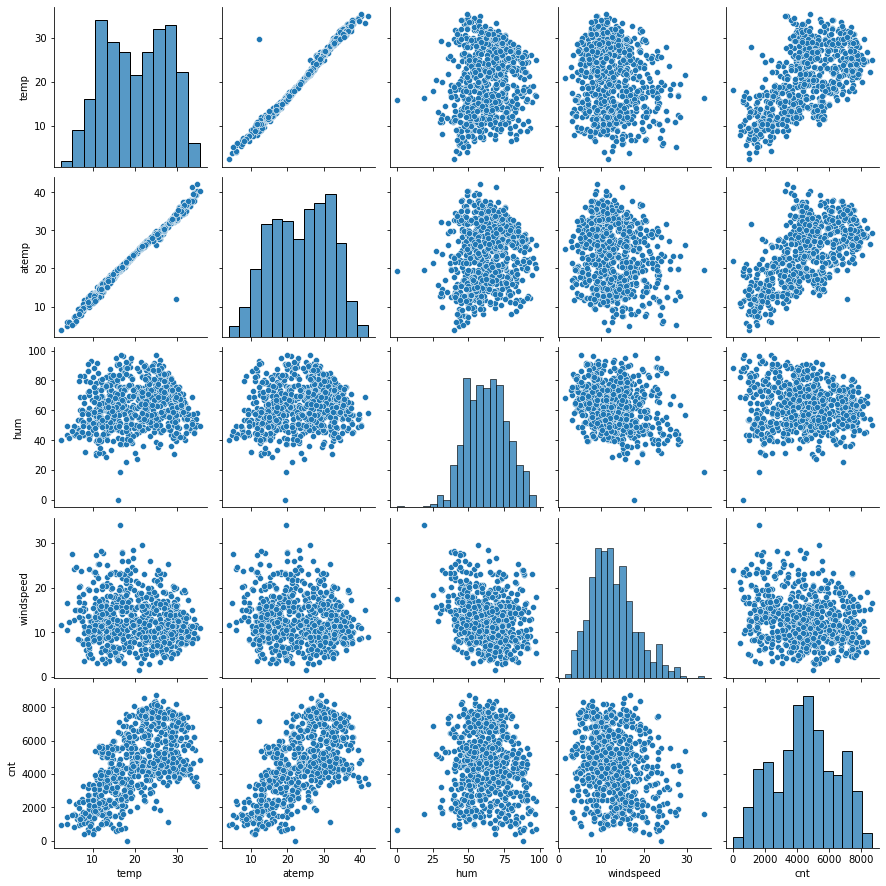

In [13]:
# Analysing the numerical columns.

sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

In [14]:
# Checking corelation between numerical variables.
df.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


#### There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables.

### Visualising Categorical Variables
#### As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

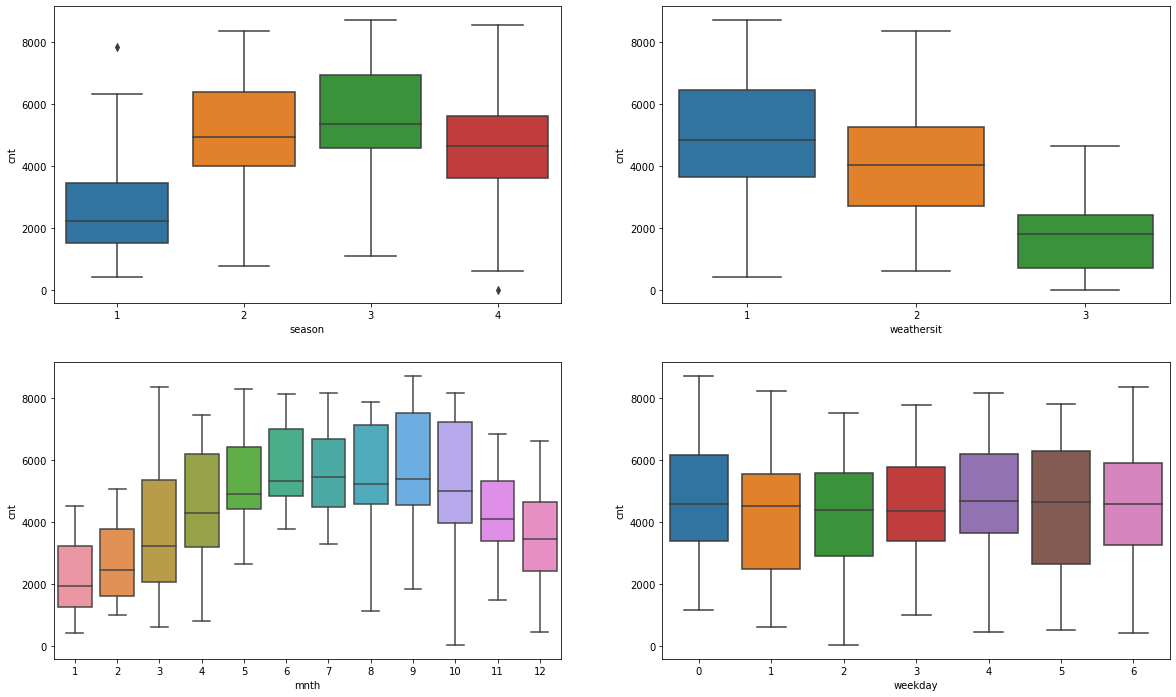

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.show()

## Step 3: Data Preparation

### Dummy Variables

In [16]:
df_new=pd.get_dummies(df,drop_first=True)

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [18]:
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [19]:
import sklearn 
from sklearn.model_selection import train_test_split

In [20]:
df_new_train , df_new_test = train_test_split(df_new, train_size=0.70, random_state=100)
print(df_new_train.shape)
print(df_new_test.shape)

(510, 30)
(220, 30)


#### Rescaling the Features 

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler=MinMaxScaler()

In [23]:
df_new_numeric=['temp','atemp','hum','windspeed','cnt']

In [24]:
df_new_train[df_new_numeric] = scaler.fit_transform(df_new_train[df_new_numeric])

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [25]:
df_new_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
df_new_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


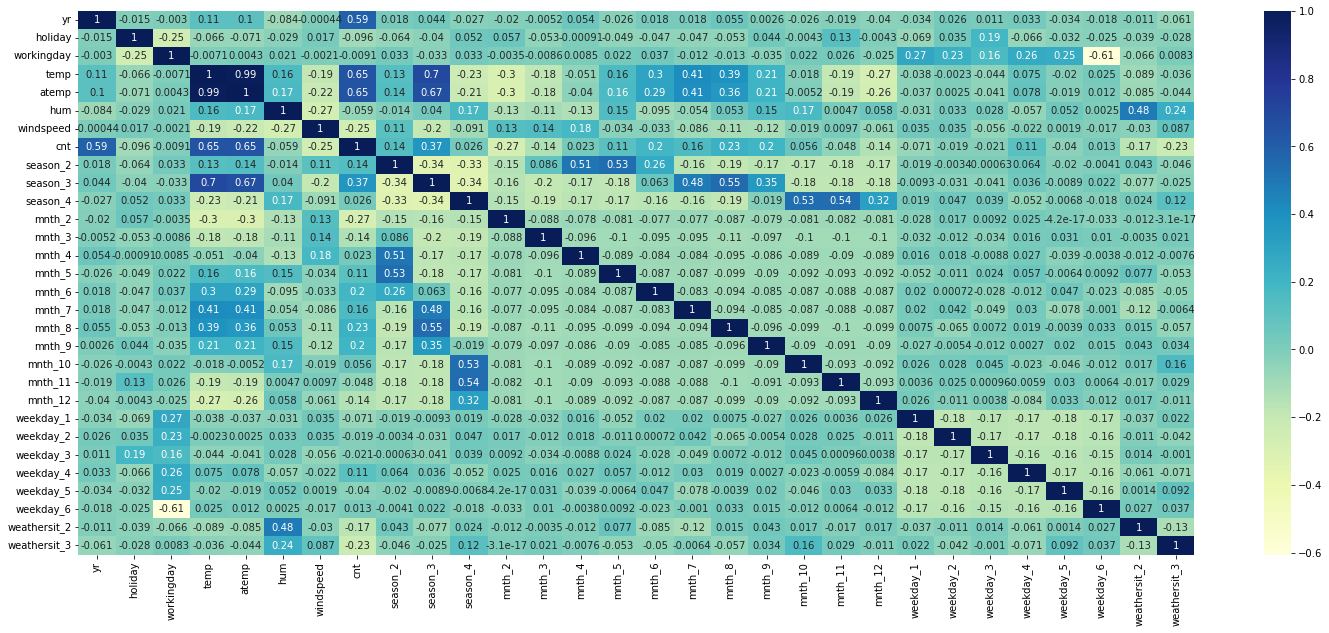

In [27]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 10))
sns.heatmap(df_new_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### -'cnt' seems to have correlation with year variable and temp. The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable. 
####  -We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

### Dividing into X and Y sets for the model building

In [28]:
y_train = df_new_train.pop('cnt')
X_train = df_new_train

In [29]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [30]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Step 5: Building a linear model

In [31]:
# Importing

import statsmodels.api as sm

In [32]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const           0.236688
yr              0.231219
holiday        -0.134550
workingday     -0.060477
temp            0.387322
atemp           0.054682
hum            -0.157869
windspeed      -0.180241
season_2        0.086710
season_3        0.040876
season_4        0.152994
mnth_2          0.026713
mnth_3          0.065044
mnth_4          0.064014
mnth_5          0.089565
mnth_6          0.073722
mnth_7          0.036630
mnth_8          0.093070
mnth_9          0.155577
mnth_10         0.069786
mnth_11         0.024471
mnth_12         0.019596
weekday_1       0.025218
weekday_2       0.023757
weekday_3       0.039628
weekday_4       0.054077
weekday_5       0.049879
weekday_6      -0.005841
weathersit_2   -0.057807
weathersit_3   -0.249238
dtype: float64

In [33]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.24e-177
Time:                        15:13:58   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     480   BIC:                            -859.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2367      0.030      7.821   

In [34]:
# Importing VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
VIF = pd.DataFrame()
VIF['Features'] = X_train.columns
VIF['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
3,temp,445.99
4,atemp,381.74
2,workingday,229.52
21,weekday_1,50.79
22,weekday_2,49.63
25,weekday_5,48.17
24,weekday_4,47.11
23,weekday_3,43.27
5,hum,22.75
8,season_3,15.38


In [36]:
# Importing RFE And Linear regression.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 4),
 ('season_4', True, 1),
 ('mnth_2', False, 16),
 ('mnth_3', False, 5),
 ('mnth_4', False, 8),
 ('mnth_5', False, 6),
 ('mnth_6', False, 7),
 ('mnth_7', False, 17),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('mnth_11', False, 18),
 ('mnth_12', False, 19),
 ('weekday_1', False, 14),
 ('weekday_2', False, 15),
 ('weekday_3', False, 13),
 ('weekday_4', False, 11),
 ('weekday_5', False, 12),
 ('weekday_6', False, 20),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [39]:
columns = X_train.columns[rfe.support_]
columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'weathersit_3'],
      dtype='object')

In [40]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[columns]

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.02
2,temp,8.52
4,windspeed,3.57
0,yr,2.01
5,season_2,1.82
6,season_4,1.73
7,mnth_8,1.57
8,mnth_9,1.30
9,weathersit_3,1.09
1,holiday,1.04


In [42]:
# Dropping 'hum' as its VIF is very high.

X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [43]:
# Again checking for the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.99
3,windspeed,3.01
0,yr,2.00
4,season_2,1.79
6,mnth_8,1.57
5,season_4,1.44
7,mnth_9,1.29
8,weathersit_3,1.06
1,holiday,1.04


In [44]:
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [45]:
# Printing summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     230.3
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.39e-171
Time:                        15:14:05   Log-Likelihood:                 456.65
No. Observations:                 510   AIC:                            -893.3
Df Residuals:                     500   BIC:                            -851.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0900      0.017      5.181   

In [46]:
# Dropping 'mnth_8' because its high p value.

X_train_new = X_train_new.drop(["mnth_8"], axis = 1)

In [47]:
# Calculating the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,season_2,1.55
5,season_4,1.34
6,mnth_9,1.20
7,weathersit_3,1.06
1,holiday,1.03


In [48]:
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          9.22e-172
Time:                        15:14:05   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0875      0.017      5.029   

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Step 6: Residual Analysis of the train data

In [49]:
y_train_pred = lr3.predict(X_train_lm3)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

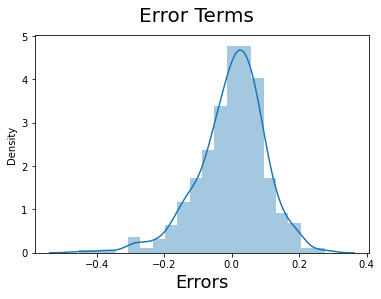

In [50]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

####  From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

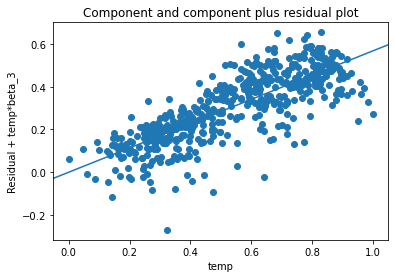

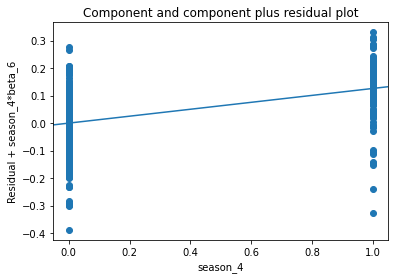

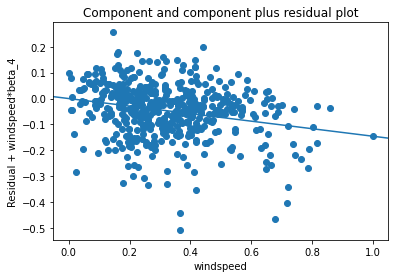

In [51]:
sm.graphics.plot_ccpr(lr3, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr3, 'season_4')
plt.show()

sm.graphics.plot_ccpr(lr3, 'windspeed')
plt.show()

#### Linearity can be observed from above visualizations.

## Step 7: Making Predictions Using the Final Model

In [52]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

df_new_numeric = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_new_test[df_new_numeric] = scaler.transform(df_new_test[df_new_numeric])

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [53]:
df_new_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
df_new_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.118182,0.122727,0.159091,0.140909,0.131818,0.172727,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.323559,0.328872,0.366595,0.348721,0.339064,0.378873,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [55]:
y_test = df_new_test.pop('cnt')
X_test = df_new_test

In [56]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   holiday       220 non-null    int64  
 3   temp          220 non-null    float64
 4   windspeed     220 non-null    float64
 5   season_2      220 non-null    uint8  
 6   season_4      220 non-null    uint8  
 7   mnth_9        220 non-null    uint8  
 8   weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(4)
memory usage: 11.2 KB


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [57]:
# Making predictions using the final model (lr3)

y_pred = lr3.predict(X_test_lm)

## Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

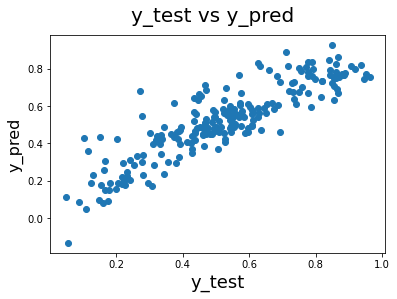

In [58]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [59]:
round(lr3.params,4)

const           0.0875
yr              0.2334
holiday        -0.0867
temp            0.5682
windspeed      -0.1455
season_2        0.0812
season_4        0.1261
mnth_9          0.0895
weathersit_3   -0.2535
dtype: float64

#### Equation for best fit line should be

#### cnt = 0.0875 + yr(0.2334) - holiday(0.0867) + temp(0.5682) - windspeed(0.1455) + season_2(0.0812) + season_4(0.1261) + mnth_9(0.0895) - weathersit_3(0.2535)

### R^2 Value for TEST

In [60]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print(r2)

0.7720731949554799


In [61]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7634


## Results

- Train dataset R^2          : 0.804
- Train dataset Adjusted R^2 : 0.801 
    
- Test dataset R^2           : 0.772   
- Test dataset Adjusted R^2  : 0.763

### Demand of bikes depends upon year, holiday, tempreature, windspeed, mnth_9 i.e september, seasons like summer and winter. 